In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:\Surya\DA\Hackathons\Python Hackathon Dec2023\Exam Stress Final.xlsx",sheet_name=None)
grades=df['Grades']
demography=df['Demography']
eda=df['EDA']
hr=df['HR']
temp=df['Temp']
ibi=df['IBI']


Q1. Using the mean interbeat interval per minute, calculate the Root Mean Square of successive differences for any 30 minute interval and add this to IBI

In [3]:
ibi_mean = np.mean(ibi.IBI)
selected_interval = ibi.IBI[:30]
successive_diff = np.diff(selected_interval)
rmssd = np.sqrt(np.mean(successive_diff**2))
ibi_with_rmssd = ibi_mean + rmssd
print('RMSSD: ',ibi_with_rmssd)

RMSSD:  0.6549284511905323


Q7. "Using numpy functions, transpose and multiply the following arrays
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) "

In [18]:
a = np.arange(4).reshape(2, 2)
b = np.arange(6).reshape(3, 2)
print("\n Array a:")
print(a)
print("\n Array b:")
print(b)
print("\nTransposed Array a:")
print(np.transpose(a))

print("\nTransposed Array b:")
print(np.transpose(b))

print("\nResult of Transposed Multiplication:")
print(np.dot(a_transposed, b_transposed))


 Array a:
[[0 1]
 [2 3]]

 Array b:
[[0 1]
 [2 3]
 [4 5]]

Transposed Array a:
[[0 2]
 [1 3]]

Transposed Array b:
[[0 2 4]
 [1 3 5]]

Result of Transposed Multiplication:
[[ 2  6 10]
 [ 3 11 19]]


Q8.Write a Python program to create an array of 5 integers and display the array items in reverse order

In [13]:
array1 = np.array([1, 2, 3, 4, 5])
print("Array Created:", array1)

rev_array1 = np.flip(array1)
print("\nArray in Reverse Order:", rev_array1)

Array Created: [1 2 3 4 5]

Array in Reverse Order: [5 4 3 2 1]


Q9. What was the average grade for all students in the final exam vs both midterms

In [16]:
average_grades_by_student = grades.groupby('Student_id').mean()

print("Average Grade for all Students:")
print(average_grades_by_student)

Average Grade for all Students:
            Midterm 1  Midterm 2  final
Student_id                             
S01              78.0       82.0  182.0
S02              82.0       85.0  180.0
S03              77.0       90.0  188.0
S04              75.0       77.0  149.0
S05              67.0       77.0  157.0
S06              71.0       64.0  175.0
S07              64.0       33.0  110.0
S08              92.0       88.0  184.0
S09              80.0       39.0  126.0
S10              89.0       64.0  116.0


In [25]:
for index, row in demography.iterrows():
    if row['DOB'].year == 2010:
        full_name = f"{row['First Name']} {row['Last Name']}"
        students_born_2010_names.append(full_name)

# Display the full names of students born in 2010
print("Full Names of Students Born in 2010:")
for name in students_born_2010_names:
    print(name)

Full Names of Students Born in 2010:
Roger Frederick


In [27]:
# Create an empty list to store full names of students born in 2010
students_born_2010_names = []

# Iterate through rows and check if the student was born in 2010
for index, row in demography.iterrows():
    if row['DOB'].year == 2010:
        full_name = f"{row['First Name']} {row['Last Name']}"
        students_born_2010_names.append(full_name)

# Display the full names of students born in 2010
print("Full Names of Students Born in 2010:")
for name in students_born_2010_names:
    print(name)

Full Names of Students Born in 2010:
Roger Frederick


In [30]:
students_born_2010 = demography[demography['DOB'].dt.year == 2010]

# Display the full names of students born in 2010 without row numbers
print("Full Names of Students Born in 2010:")
print(students_born_2010[['First Name', 'Last Name']].to_string(index=False))

Full Names of Students Born in 2010:
First Name Last Name
     Roger Frederick


In [35]:
top_3_midterm2 = grades.sort_values(by='Midterm 2', ascending=False).head(3)

# Get the Student_ids of the top 3 grades
top_3_student_ids = top_3_midterm2['Student_id']

# Filter the HR DataFrame for students with top 3 grades in Midterm 2
hr_top_3 = hr[hr['Student_id'].isin(top_3_student_ids)]

# Calculate the average HR for these students
average_hr_top_3 = hr_top_3['HR'].mean()

print(f"The average HR of students with top 3 grades in Midterm 2: {average_hr_top_3:.2f}")

The average HR of students with top 3 grades in Midterm 2: 107.99


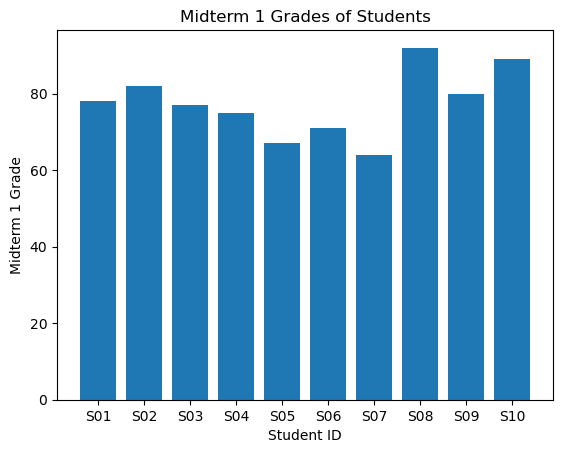

In [38]:
plt.bar(grades['Student_id'], grades['Midterm 1'])

# Set labels and title
plt.xlabel('Student ID')
plt.ylabel('Midterm 1 Grade')
plt.title('Midterm 1 Grades of Students')

# Display the bar chart
plt.show()

In [40]:
female_percentage = (demography['Gender'].value_counts(normalize=True).get('F', 0)) * 100

print(f"The percentage of female students is: {female_percentage:.2f}%")

The percentage of female students is: 50.00%


In [42]:
students_below_basal_temp = temp[temp['TEMP'] < 36]

# Display the relevant information
print("Students for whom temperature fell below basal body temp of 36 degrees:")
print(students_below_basal_temp)

Students for whom temperature fell below basal body temp of 36 degrees:
        TEMP  Time in mins Student_id       Exam
0     22.080             1        S01      final
1     22.048             2        S01      final
2     22.022             3        S01      final
3     22.339             4        S01      final
4     22.416             5        S01      final
...      ...           ...        ...        ...
7369  22.344           212       S010  Midterm 2
7370  22.341           213       S010  Midterm 2
7371  22.344           214       S010  Midterm 2
7372  22.342           215       S010  Midterm 2
7373  22.346           216       S010  Midterm 2

[7367 rows x 4 columns]


In [44]:
students_below_basal_temp = temp[temp['TEMP'] < 36]

# Extract distinct student IDs from the filtered DataFrame
distinct_student_ids = students_below_basal_temp['Student_id'].drop_duplicates()

# Display distinct student IDs for whom temperature fell below basal body temp
print("Distinct Student IDs for whom temperature fell below basal body temp of 36 degrees:")
print(distinct_student_ids)

Distinct Student IDs for whom temperature fell below basal body temp of 36 degrees:
0        S01
760      S02
1612     S03
2415     S04
3097     S05
3751     S06
4570     S07
5283     S08
5926     S09
6580    S010
Name: Student_id, dtype: object


In [46]:
students_below_basal_temp = temp[temp['TEMP'] < 36]

# Merge with Demography to get first name and last name
result_df = pd.merge(students_below_basal_temp[['Student_id']],
                     demography[['Student_id', 'First Name', 'Last Name']],
                     on='Student_id',
                     how='inner')

# Display distinct student IDs with first name and last name
print("Distinct Student IDs with first name and last name for whom temperature fell below basal body temp of 36 degrees:")
print(result_df.drop_duplicates(subset='Student_id'))

Distinct Student IDs with first name and last name for whom temperature fell below basal body temp of 36 degrees:
     Student_id First Name  Last Name
0           S01    Barbara    Walters
760         S02       Nora      Jones
1605        S03    Gabriel    Willows
2408        S04       John        Doe
3090        S05       Jane        Doe
3744        S06        Pat     Murray
4563        S07      Roger  Frederick
5276        S08       John      Wills
5919        S09       Paul    Cartney


In [47]:
phonebook = {"john": 938477566, "Jack": 938377264, "Jill": 947662781}

# Attempt to find Joe's phone number with a default value
joe_phone = phonebook.get("Joe", "Joe's phone number not found")

print(joe_phone)

Joe's phone number not found


In [51]:
midterm2_df = eda[eda['Exam'] == 'Midterm 2']

# Calculate the average duration of Midterm 2
average_duration_midterm2 = midterm2_df['Time in mins'].mean()
print(average_duration_midterm2)

print(f"The average duration of Midterm 2 for all 10 students: {average_duration_midterm2:.2f} minutes")

nan
The average duration of Midterm 2 for all 10 students: nan minutes


In [57]:
midterm2_df = eda[eda['Exam'] == 'midterm 2']
print(midterm2_df)

# Calculate the average duration of Midterm 2, excluding NaN values
average_duration_midterm2 = midterm2_df['Time in mins'].mean()

print(f"The average duration of Midterm 2 for all 10 students: {average_duration_midterm2:.2f} minutes")

        EDA  Time in mins Student_id       Exam
575   0.040             1        S01  midterm 2
576   0.024             2        S01  midterm 2
577   0.023             3        S01  midterm 2
578   0.024             4        S01  midterm 2
579   0.024             5        S01  midterm 2
...     ...           ...        ...        ...
7369  0.021           212       S010  midterm 2
7370  0.021           213       S010  midterm 2
7371  0.021           214       S010  midterm 2
7372  0.021           215       S010  midterm 2
7373  0.021           216       S010  midterm 2

[2014 rows x 4 columns]
The average duration of Midterm 2 for all 10 students: 102.63 minutes


In [ ]:
print(demography[demography[]])